In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy.misc
from scipy import ndimage
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def showImage(img):
    plt.imshow(img)
    plt.show()

In [4]:
def showGrayImage(gray):
    plt.imshow(gray, cmap = plt.get_cmap('gray'))
    plt.show()

In [5]:
def getImage():
    return scipy.misc.face();

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

(768, 1024)


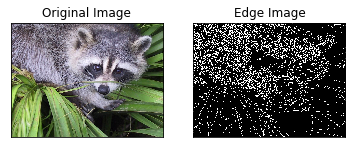

In [7]:

img = getImage();
edges = cv2.Canny(img,100,200)
print(edges.shape)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [8]:
filter = np.zeros([3,3], dtype=np.float64)
filter[0,:] = np.repeat(1, 3)
filter[1,:] = np.repeat(0, 3)
filter[2,:] = np.repeat(-1, 3)

print(filter)
print(filter.dtype)

[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]
float64


In [9]:
def conv(chnl, filter):
    wd = chnl.shape[1]-filter.shape[1]+1
    ht = chnl.shape[0]-filter.shape[0]+1
    final = np.zeros([ht,wd], filter.dtype)
    filter_w = filter.shape[1]
    filter_h = filter.shape[0]
    
    for w in range(0, wd):
        for h in range(0, ht):
            chnl[h : h+filter_h, w : w+filter_w]
            mult = np.multiply(chnl[h : h+filter_h, w : w+filter_w], filter)
            final[h,w] = np.sum(mult)
            
    return final


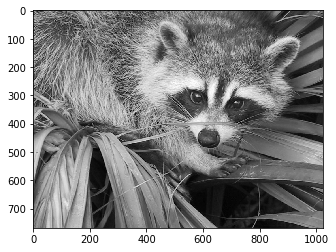

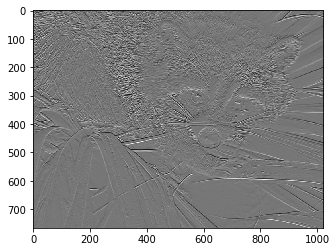

In [10]:
grayImg = rgb2gray(img)
filterImg = conv(grayImg, filter)

showGrayImage(grayImg)
showGrayImage(filterImg)

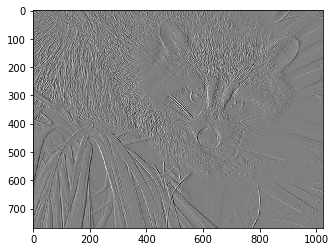

In [11]:
# sobel using ndimage
ndSobel = ndimage.sobel(grayImg, axis=1)
showGrayImage(ndSobel)

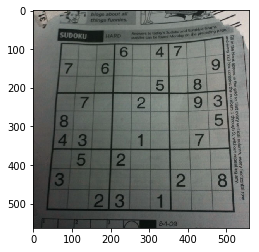

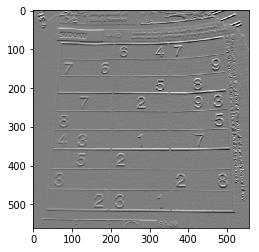

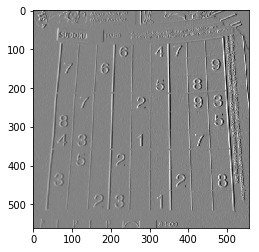

In [15]:
# more images
SUDOKU_URL = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png"

sudoku = cv2.imread(tf.keras.utils.get_file(SUDOKU_URL.split('/')[-1], SUDOKU_URL))
showImage(sudoku)
sudokuGray = rgb2gray(sudoku)

res = conv(sudokuGray, filter)
showGrayImage(res)

res = conv(sudokuGray, filter.T)
showGrayImage(res)